In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk as nltk
nltk.download('punkt')
nltk.download('stopwords')
import string as str
from nltk.tokenize import word_tokenize
import nltk.data
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, accuracy_score,confusion_matrix,classification_report
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data=pd.read_csv("Language Detection.csv")
pd.set_option('display.max_colwidth',200)
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural, physical, material world or universe.",English
1,"""Nature"" can refer to the phenomena of the physical world, and also to life in general.",English
2,"The study of nature is a large, if not the only, part of science.",English
3,"Although humans are part of nature, human activity is often understood as a separate category from other natural phenomena.",English
4,"[1] The word nature is borrowed from the Old French nature and is derived from the Latin word natura, or ""essential qualities, innate disposition"", and in ancient times, literally meant ""birth"".",English


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [ ]:
column_a = data["Text"]
print(column_a)

0                                                                                                                           Nature, in the broadest sense, is the natural, physical, material world or universe.
1                                                                                                                        "Nature" can refer to the phenomena of the physical world, and also to life in general.
2                                                                                                                                              The study of nature is a large, if not the only, part of science.
3                                                                                    Although humans are part of nature, human activity is often understood as a separate category from other natural phenomena.
4             [1] The word nature is borrowed from the Old French nature and is derived from the Latin word natura, or "essential qualities, innate disposition", an

In [ ]:
df=data.copy()

In [ ]:
df.Language.value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

Text(0.5, 1.0, 'Target Labels')

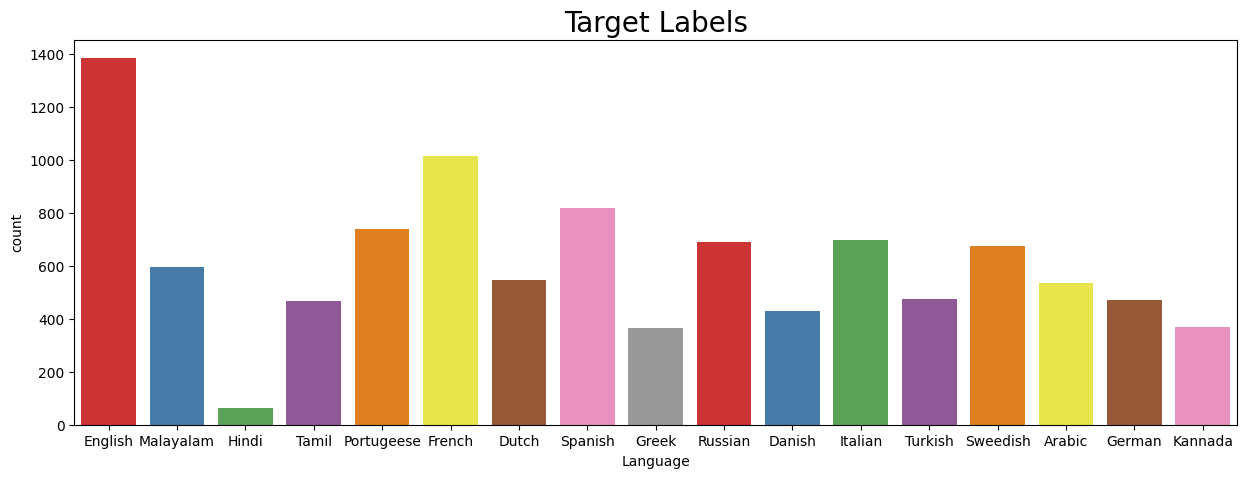

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.countplot(x='Language',data=data,palette='Set1')
plt.title('Target Labels',fontsize=20)

In [ ]:
punct=str.punctuation
print(punct)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
pd.set_option('display.max_colwidth',200)

In [ ]:
data['Text'][3500:4000]

3500                                                                                  ), textes et illustrations comprises (la taille du fichier correspondant variant selon la version linguistique utilisée).
3501    Le projet Afripédia avait notamment fait usage de ce logiciel : dans les campus universitaires d'Afrique dont la liaison internet ne disposait pas d'un débit suffisant pour permettre de consulter ...
3502                                Kiwix est également utilisé par la Human Rights Foundation en Corée du Nord, où la version coréenne de l'encyclopédie est introduite en contrebande par des dissidents[16].
3503                       Depuis 2016, des applications mobiles contenant le corpus médical de l'encyclopédie ont également fait leur apparition sous Android, toujours grâce à Kiwix, sous le nom de WikiMed.
3504                                           Une autre manière de consulter Wikipédia hors ligne est d'utiliser les dumps (sauvegardes), qui sont disponibles en ligne

In [ ]:
 #removing punctuation
def remove_punct(tokens):
    filtered_sentence_stopwords =""
    PUNCT = str.punctuation
    PUNCT+='""'
    PUNCT+='``'
    PUNCT+="''"+"«"+"»"+"؟"

    for w in tokens:
        if w not in PUNCT:
            filtered_sentence_stopwords+=w
    return filtered_sentence_stopwords
df['text_nopunc']=data['Text'].apply(lambda x:remove_punct(x.lower()))
df.head(500)

,Text,Language,text_nopunc
0,"Nature, in the broadest sense, is the natural, physical, material world or universe.",English,nature in the broadest sense is the natural physical material world or universe
1,"""Nature"" can refer to the phenomena of the physical world, and also to life in general.",English,nature can refer to the phenomena of the physical world and also to life in general
2,"The study of nature is a large, if not the only, part of science.",English,the study of nature is a large if not the only part of science
3,"Although humans are part of nature, human activity is often understood as a separate category from other natural phenomena.",English,although humans are part of nature human activity is often understood as a separate category from other natural phenomena
4,"[1] The word nature is borrowed from the Old French nature and is derived from the Latin word natura, or ""essential qualities, innate disposition"", and in ancient times, literally meant ""birth"".",English,1 the word nature is borrowed from the old french nature and is derived from the latin word natura or essential qualities innate disposition and in ancient times literally meant birth
...,...,...,...
495,"While generally praising the article on William Clarke Quantrill, he quoted its conclusion as an example of such ""waffling"", which then stated: ""Some historians [...] remember him as an opportunis...",English,while generally praising the article on william clarke quantrill he quoted its conclusion as an example of such waffling which then stated some historians remember him as an opportunistic bloodth...
496,"""[190] Other critics have made similar charges that, even if Wikipedia articles are factually accurate, they are often written in a poor, almost unreadable style.",English,190 other critics have made similar charges that even if wikipedia articles are factually accurate they are often written in a poor almost unreadable style
497,"Frequent Wikipedia critic Andrew Orlowski commented, ""Even when a Wikipedia entry is 100 percent factually correct, and those facts have been carefully chosen, it all too often reads as if it has ...",English,frequent wikipedia critic andrew orlowski commented even when a wikipedia entry is 100 percent factually correct and those facts have been carefully chosen it all too often reads as if it has been...
498,"""[191] A study of Wikipedia articles on cancer was conducted in 2010 by Yaacov Lawrence of the Kimmel Cancer Center at Thomas Jefferson University.",English,191 a study of wikipedia articles on cancer was conducted in 2010 by yaacov lawrence of the kimmel cancer center at thomas jefferson university


In [ ]:
df['text_nopunc'][1424:9450]

1424                                                                                                     അനാവശ്യ മാറ്റങ്ങൾ വളരെ പെട്ടെന്നു തന്നെ സാധാരണയായി ഒഴിവാക്കാറുണ്ട്
1425                                                                         അതുപോലെ തുടർച്ചയായി ശല്യപ്പെടുത്തുന്ന നിയമവിരുദ്ധരെ മാറ്റങ്ങൾ വരുത്തുന്നതിൽ നിന്നും തടയാറുണ്ട്
1426                                                                                                                       നിലവിൽ301 ഭാഷകളിൽ വിക്കിപീഡിയയുടെ പതിപ്പുകളുണ്ട്
1427                                                             മൃതമായി കൊണ്ടിരുന്ന പല ഭാഷകളും ലിപികളും വിക്കിപീഡിയയുടെ പ്രവർത്തനങ്ങളിലൂടെ പുനർജീവിച്ചു കൊണ്ടിരിക്കുന്നു13
1428                                                                 നാല്പത്തഞ്ച് ലക്ഷത്തിനടുത്ത് ലേഖനങ്ങളുള്ള വിക്കിപീഡിയയുടെ ഇംഗ്ലീഷ് പതിപ്പാണ് ഈ സംരംഭത്തിന്റെ പതാകവാഹക‍
                                                                                       ...                                                  

In [ ]:
def tokenize(text):
    tokens=word_tokenize(text)
    return tokens
df['text_tokniz']=df['text_nopunc'].apply(lambda x : tokenize (x))
df.head()

,Text,Language,text_nopunc,text_tokniz
0,"Nature, in the broadest sense, is the natural, physical, material world or universe.",English,nature in the broadest sense is the natural physical material world or universe,"[nature, in, the, broadest, sense, is, the, natural, physical, material, world, or, universe]"
1,"""Nature"" can refer to the phenomena of the physical world, and also to life in general.",English,nature can refer to the phenomena of the physical world and also to life in general,"[nature, can, refer, to, the, phenomena, of, the, physical, world, and, also, to, life, in, general]"
2,"The study of nature is a large, if not the only, part of science.",English,the study of nature is a large if not the only part of science,"[the, study, of, nature, is, a, large, if, not, the, only, part, of, science]"
3,"Although humans are part of nature, human activity is often understood as a separate category from other natural phenomena.",English,although humans are part of nature human activity is often understood as a separate category from other natural phenomena,"[although, humans, are, part, of, nature, human, activity, is, often, understood, as, a, separate, category, from, other, natural, phenomena]"
4,"[1] The word nature is borrowed from the Old French nature and is derived from the Latin word natura, or ""essential qualities, innate disposition"", and in ancient times, literally meant ""birth"".",English,1 the word nature is borrowed from the old french nature and is derived from the latin word natura or essential qualities innate disposition and in ancient times literally meant birth,"[1, the, word, nature, is, borrowed, from, the, old, french, nature, and, is, derived, from, the, latin, word, natura, or, essential, qualities, innate, disposition, and, in, ancient, times, liter..."


In [ ]:
stop_words_en = nltk.corpus.stopwords.words('english')
stop_words_ge = stopwords.words('german')
stop_words_fr = stopwords.words('french')
stop_words_it = stopwords.words('italian')
stop_words_po = stopwords.words('portuguese')
stop_words_ru = stopwords.words('russian')
stop_words_sp = stopwords.words('spanish')
stop_words_sw = stopwords.words('swedish')
stop_words_da = stopwords.words('danish')
stop_words_du = stopwords.words('dutch')
stop_words_ar = stopwords.words('arabic')
stop_words_tu = stopwords.words('turkish')
stop_words_gr = stopwords.words('greek')

In [ ]:
def remove_stopwords(tok_l,stopwords):
    filtered_sentence =[]
    for w in tok_l:
        if w not in stopwords:
            filtered_sentence.append(w)
    return filtered_sentence

In [ ]:
df['filtered_sentence_stopwords']=df['text_tokniz'].apply(lambda x : remove_stopwords(x,stop_words_en))

In [ ]:
df['filtered_sentence_stopwords']=df['filtered_sentence_stopwords'].apply(lambda x : remove_stopwords(x,stop_words_ge))

In [ ]:
df['filtered_sentence_stopwords']=df['filtered_sentence_stopwords'].apply(lambda x : remove_stopwords(x,stop_words_fr))

In [ ]:
df['filtered_sentence_stopwords']=df['filtered_sentence_stopwords'].apply(lambda x : remove_stopwords(x,stop_words_ru))

In [ ]:
df['filtered_sentence_stopwords']=df['filtered_sentence_stopwords'].apply(lambda x : remove_stopwords(x,stop_words_sp))

In [ ]:
df['filtered_sentence_stopwords']=df['filtered_sentence_stopwords'].apply(lambda x : remove_stopwords(x,stop_words_sw))

In [ ]:
df['filtered_sentence_stopwords']=df['filtered_sentence_stopwords'].apply(lambda x : remove_stopwords(x,stop_words_da))

In [ ]:
df['filtered_sentence_stopwords']=df['filtered_sentence_stopwords'].apply(lambda x : remove_stopwords(x,stop_words_du))

In [ ]:
df['filtered_sentence_stopwords']=df['filtered_sentence_stopwords'].apply(lambda x : remove_stopwords(x,stop_words_ar))

In [ ]:
df['filtered_sentence_stopwords']=df['filtered_sentence_stopwords'].apply(lambda x : remove_stopwords(x,stop_words_tu))

In [ ]:
df['filtered_sentence_stopwords']=df['filtered_sentence_stopwords'].apply(lambda x : remove_stopwords(x,stop_words_gr))

In [ ]:
df['filtered_sentence_stopwords']=df['filtered_sentence_stopwords'].apply(lambda x : remove_stopwords(x,stop_words_it))

In [ ]:
df['filtered_sentence_stopwords']=df['filtered_sentence_stopwords'].apply(lambda x : remove_stopwords(x,stop_words_po))

In [ ]:
df.head(3280)

,Text,Language,text_nopunc,text_tokniz,filtered_sentence_stopwords
0,"Nature, in the broadest sense, is the natural, physical, material world or universe.",English,nature in the broadest sense is the natural physical material world or universe,"[nature, in, the, broadest, sense, is, the, natural, physical, material, world, or, universe]","[nature, broadest, sense, natural, physical, material, world, universe]"
1,"""Nature"" can refer to the phenomena of the physical world, and also to life in general.",English,nature can refer to the phenomena of the physical world and also to life in general,"[nature, can, refer, to, the, phenomena, of, the, physical, world, and, also, to, life, in, general]","[nature, refer, phenomena, physical, world, life, general]"
2,"The study of nature is a large, if not the only, part of science.",English,the study of nature is a large if not the only part of science,"[the, study, of, nature, is, a, large, if, not, the, only, part, of, science]","[study, nature, large, part, science]"
3,"Although humans are part of nature, human activity is often understood as a separate category from other natural phenomena.",English,although humans are part of nature human activity is often understood as a separate category from other natural phenomena,"[although, humans, are, part, of, nature, human, activity, is, often, understood, as, a, separate, category, from, other, natural, phenomena]","[although, humans, part, nature, human, activity, often, understood, separate, category, natural, phenomena]"
4,"[1] The word nature is borrowed from the Old French nature and is derived from the Latin word natura, or ""essential qualities, innate disposition"", and in ancient times, literally meant ""birth"".",English,1 the word nature is borrowed from the old french nature and is derived from the latin word natura or essential qualities innate disposition and in ancient times literally meant birth,"[1, the, word, nature, is, borrowed, from, the, old, french, nature, and, is, derived, from, the, latin, word, natura, or, essential, qualities, innate, disposition, and, in, ancient, times, liter...","[1, word, nature, borrowed, old, french, nature, derived, latin, word, natura, essential, qualities, innate, disposition, ancient, times, literally, meant, birth]"
...,...,...,...,...,...
3275,La première grande philosophie de la nature se trouve dans l'œuvre d'Aristote.,French,la première grande philosophie de la nature se trouve dans lœuvre daristote,"[la, première, grande, philosophie, de, la, nature, se, trouve, dans, lœuvre, daristote]","[première, grande, philosophie, nature, trouve, lœuvre, daristote]"
3276,"Selon lui, « la nature ne fait rien en vain », ce qui signifie que la nature est une puissance orientée vers certaines fins.",French,selon lui la nature ne fait rien en vain ce qui signifie que la nature est une puissance orientée vers certaines fins,"[selon, lui, la, nature, ne, fait, rien, en, vain, ce, qui, signifie, que, la, nature, est, une, puissance, orientée, vers, certaines, fins]","[selon, nature, fait, rien, vain, signifie, nature, puissance, orientée, vers, certaines, fins]"
3277,L'explication scientifique consistera donc à découvrir cette finalité.,French,lexplication scientifique consistera donc à découvrir cette finalité,"[lexplication, scientifique, consistera, donc, à, découvrir, cette, finalité]","[lexplication, scientifique, consistera, donc, découvrir, cette, finalité]"
3278,"Par exemple, si l'eau monte dans un tuyau dont on aspire l'air, c'est parce que ""la nature a horreur du vide"".",French,par exemple si leau monte dans un tuyau dont on aspire lair cest parce que la nature a horreur du vide,"[par, exemple, si, leau, monte, dans, un, tuyau, dont, on, aspire, lair, cest, parce, que, la, nature, a, horreur, du, vide]","[exemple, leau, monte, tuyau, dont, aspire, lair, cest, parce, nature, horreur, vide]"


In [ ]:
f=df['text_nopunc']
l=df['Language']
print(f)

0                                                                                                                                nature in the broadest sense is the natural physical material world or universe
1                                                                                                                            nature can refer to the phenomena of the physical world and also to life in general
2                                                                                                                                                 the study of nature is a large if not the only part of science
3                                                                                      although humans are part of nature human activity is often understood as a separate category from other natural phenomena
4                        1 the word nature is borrowed from the old french nature and is derived from the latin word natura or essential qualities innate dispositio

In [ ]:
codel = {"English":0,
"French":1,
"Spanish":2,
"Portugeese":3,
"Italian":4,
"Russian":5,
"Sweedish":6,
"Malayalam":7,
"Dutch":8,
"Arabic":9,
"Turkish":10,
"German":11,
"Tamil":12,
"Danish":13,
"Kannada":14,
"Greek":15,
"Hindi":16}
def getcodel(n) :
    for x , y in codel.items() :
        if n == y :
            return x
print(getcodel(0))

English


In [ ]:
code = {0:"English",
1:"French",
2:"Spanish",
3:"Portugeese",
4:"Italian",
5:"Russian",
6:"Sweedish",
7:"Malayalam",
8:"Dutch",
9:"Arabic",
10:"Turkish",
11:"German",
12:"Tamil",
13:"Danish",
14:"Kannada",
15:"Greek",
16:"Hindi"}
def getcode(n) :
    for x , y in code.items() :
        if n == y :
            return x
print(getcode("Hindi"))

16


In [ ]:
training_data = []
for i in range(10337):
    class_num=getcode(l[i])
    #for j in f[i]:
     #   s+=" "+j
    training_data.append([f[i], class_num])

In [ ]:
print(len(training_data[0]))
print(training_data[0][0])

2
 nature in the broadest sense is the natural physical material world or universe


In [ ]:
x=[]
y=[]
for text,label in training_data:
    x.append(text)
    y.append(label)
for i in range(10):
    print(x[i])
    print(getcodel(y[i]))

 nature in the broadest sense is the natural physical material world or universe
English
nature can refer to the phenomena of the physical world and also to life in general
English
the study of nature is a large if not the only part of science
English
although humans are part of nature human activity is often understood as a separate category from other natural phenomena
English
1 the word nature is borrowed from the old french nature and is derived from the latin word natura or essential qualities innate disposition and in ancient times literally meant birth
English
2 in ancient philosophy natura is mostly used as the latin translation of the greek word physis φύσις which originally related to the intrinsic characteristics that plants animals and other features of the world develop of their own accord
English
34 
the concept of nature as a whole the physical universe is one of several expansions of the original notion1 it began with certain core applications of the word φύσις by preso

In [ ]:
tfidf=TfidfVectorizer()
features_tfidf=tfidf.fit_transform(x).toarray()
print(features_tfidf.shape)
print('Sparse Matrix :\n',features_tfidf)

(10337, 41358)
Sparse Matrix :
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
count=CountVectorizer()
features_count=count.fit_transform(x).toarray()
print(features_count.shape)
print('Sparse Matrix :\n',features_count)

(10337, 41358)
Sparse Matrix :
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
n_gram=CountVectorizer(ngram_range=(2,2))
features_n_gram=n_gram.fit_transform(x)
print(features_n_gram.shape)
print('Sparse Matrix :\n',features_n_gram)

(10337, 130499)
Sparse Matrix :
   (0, 57232)	1
  (0, 43472)	1
  (0, 82716)	1
  (0, 12866)	1
  (0, 75037)	1
  (0, 45453)	1
  (0, 83104)	1
  (0, 57149)	1
  (0, 65727)	1
  (0, 53230)	1
  (0, 94535)	1
  (0, 62490)	1
  (1, 57178)	1
  (1, 13725)	1
  (1, 71485)	1
  (1, 84762)	1
  (1, 83193)	1
  (1, 65621)	1
  (1, 60830)	1
  (1, 83197)	1
  (1, 65731)	1
  (1, 94526)	1
  (1, 5980)	1
  (1, 5272)	1
  (1, 84600)	1
  :	:
  (10334, 125529)	1
  (10334, 126177)	1
  (10334, 124419)	1
  (10334, 125693)	1
  (10334, 124224)	1
  (10334, 125464)	1
  (10334, 124463)	1
  (10334, 125963)	1
  (10334, 124262)	1
  (10334, 126182)	1
  (10335, 124242)	1
  (10335, 124414)	1
  (10335, 125156)	1
  (10335, 125400)	1
  (10336, 124513)	1
  (10336, 124383)	1
  (10336, 126035)	1
  (10336, 124734)	1
  (10336, 124851)	1
  (10336, 126079)	1
  (10336, 124292)	1
  (10336, 124477)	1
  (10336, 124197)	1
  (10336, 124613)	1
  (10336, 125415)	1


In [ ]:
print(training_data[0][0])

 nature in the broadest sense is the natural physical material world or universe


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_tfidf,y,test_size=0.1, random_state=24)

In [ ]:
language_detect_model = MultinomialNB().fit(x_train, y_train)
pred_test_MNB = language_detect_model.predict(x_test)

print (classification_report(y_test, pred_test_MNB))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       148
           1       1.00      1.00      1.00       100
           2       0.99      0.99      0.99        75
           3       1.00      0.97      0.99        74
           4       1.00      0.99      0.99        74
           5       1.00      0.96      0.98        72
           6       1.00      0.96      0.98        84
           7       1.00      0.98      0.99        49
           8       1.00      0.96      0.98        55
           9       1.00      0.93      0.96        58
          10       1.00      0.83      0.91        47
          11       1.00      0.96      0.98        50
          12       1.00      0.97      0.99        40
          13       0.97      1.00      0.99        37
          14       1.00      0.96      0.98        28
          15       1.00      0.94      0.97        32
          16       1.00      0.82      0.90        11

    accuracy              

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_count,y,test_size=0.1, random_state=24)

In [ ]:
language_detect_model = MultinomialNB().fit(x_train, y_train)
pred_test_MNB = language_detect_model.predict(x_test)
print (classification_report(y_test, pred_test_MNB))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       148
           1       1.00      1.00      1.00       100
           2       0.99      0.99      0.99        75
           3       1.00      1.00      1.00        74
           4       1.00      1.00      1.00        74
           5       1.00      1.00      1.00        72
           6       1.00      0.96      0.98        84
           7       0.98      1.00      0.99        49
           8       1.00      0.98      0.99        55
           9       1.00      0.98      0.99        58
          10       1.00      0.94      0.97        47
          11       1.00      0.98      0.99        50
          12       1.00      0.97      0.99        40
          13       0.97      1.00      0.99        37
          14       1.00      1.00      1.00        28
          15       1.00      1.00      1.00        32
          16       1.00      1.00      1.00        11

    accuracy              

In [ ]:
text ="également préciser"
x = count.transform([text])
pred = language_detect_model.predict(x)
print(getcodel(pred))

French


In [ ]:
text ="വളരെ പെട്ടെന്നു"
x = count.transform([text])
pred = language_detect_model.predict(x)
print(getcodel(pred))

Malayalam


In [ ]:
text ="من"
x = count.transform([text])
pred = language_detect_model.predict(x)
print(getcodel(pred))

Arabic


In [ ]:
import pickle
with open('count.pickle', 'wb') as handle:
    pickle.dump(count,handle)
# save the model to disk
filename = 'MultinomialNB.sav'
pickle.dump(language_detect_model, open(filename, 'wb'))


In [ ]:
import pickle
with open('count.pickle', 'rb') as handle:
    count = pickle.load(handle)

with open('MultinomialNB.sav', 'rb') as handle:
    language_detect_model = pickle.load(handle)
